# Importing Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mp
import sklearn
from sklearn.preprocessing import scale
from sklearn.preprocessing import MinMaxScaler #to scale our data
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from mpl_toolkits.mplot3d import Axes3D
from pylab import rcParams
from sklearn.decomposition import PCA

In [2]:
import sklearn.metrics as sm
from sklearn import datasets
from sklearn.metrics import confusion_matrix, classification_report

In [3]:
#setting default plotting parameters for notebook
%matplotlib inline
rcParams['figure.figsize']=7,7

# Data Exploration

In [4]:
train=pd.read_csv('data/Processed/data_2021.01.01.csv')
len(train)
train.head(2)

,bytes_out,dest_ip,dest_port,entropy,num_pkts_out,num_pkts_in,proto,src_ip,src_port,time_end,time_start,total_entropy,label
0,10051,786,9200,3.093910,7,7,6,786,56328,160946769170627,1609467672690358,34094.887,4
1,23531,786,9200,1.642038,10,7,6,786,56324,1609467691706011,1609467672689065,40226.652,1


# Data Clustering using K-Means

In [5]:
kmeans = KMeans(n_clusters=5, max_iter=700, algorithm = 'auto')
train['cluster']=kmeans.fit_predict(train[train.columns[0:]])
train

,bytes_out,dest_ip,dest_port,entropy,num_pkts_out,num_pkts_in,proto,src_ip,src_port,time_end,time_start,total_entropy,label,cluster
0,10051,786,9200,3.093910,7,7,6,786,56328,160946769170627,1609467672690358,34094.88700,4,2
1,23531,786,9200,1.642038,10,7,6,786,56324,1609467691706011,1609467672689065,40226.65200,1,0
2,32742,786,9092,1.111004,32,20,6,786,57148,1609467701725488,1609467672683006,37214.20000,1,0
3,13833,786,9300,2.344926,57,34,6,786,56998,1609467713462009,1609467682094405,33816.18400,2,0
4,224,15169,53,3.326140,7,0,17,786,46151,1609467715620521,1609467685597113,745.05536,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6475,0,786,44004,0.000000,1,1,6,786,9300,1609459290648625,1609459290648401,0.00000,3,0
6476,0,786,9300,0.000000,1,1,6,786,40914,1609459290648534,1609459290648426,0.00000,2,0
6477,0,786,9300,0.000000,1,1,6,786,40908,1609459290648572,1609459290648449,0.00000,1,0
6478,0,786,9300,0.000000,1,1,6,786,40910,1609459290648561,1609459290648466,0.00000,2,0


In [6]:
X = np.array(train.drop(['cluster'], 1).astype(float))
y = np.array(train['cluster'])
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
 #You want cluster the passenger records into 2: Survived or Not survived
kmeans.fit(X_scaled)

KMeans(max_iter=700, n_clusters=5)

In [7]:
correct = 0
for i in range(len(X_scaled)):
    predict_me = np.array(X_scaled[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = kmeans.predict(predict_me)
    if prediction[0] == y[i]:
        correct += 1

Text(0.5, 1.0, 'clustered chart')

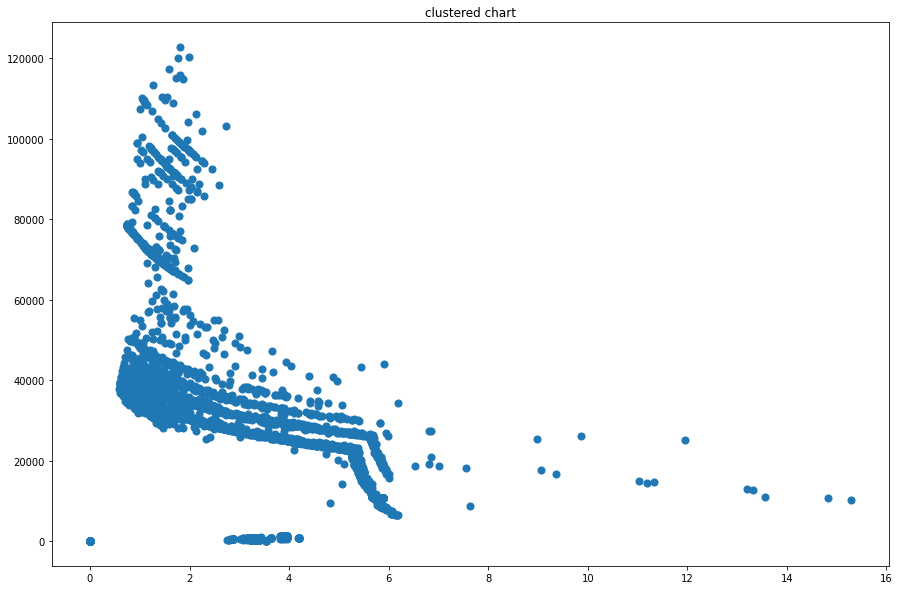

In [8]:
Xa = np.array(train.drop(['cluster'], 1).astype(float))
ya = np.array(train['cluster'])
mp.figure(figsize=(15,10))
mp.scatter(x=train['entropy'],y=train['total_entropy'], s=50)
mp.title('clustered chart')

Text(0.5, 1.0, 'clustered chart')

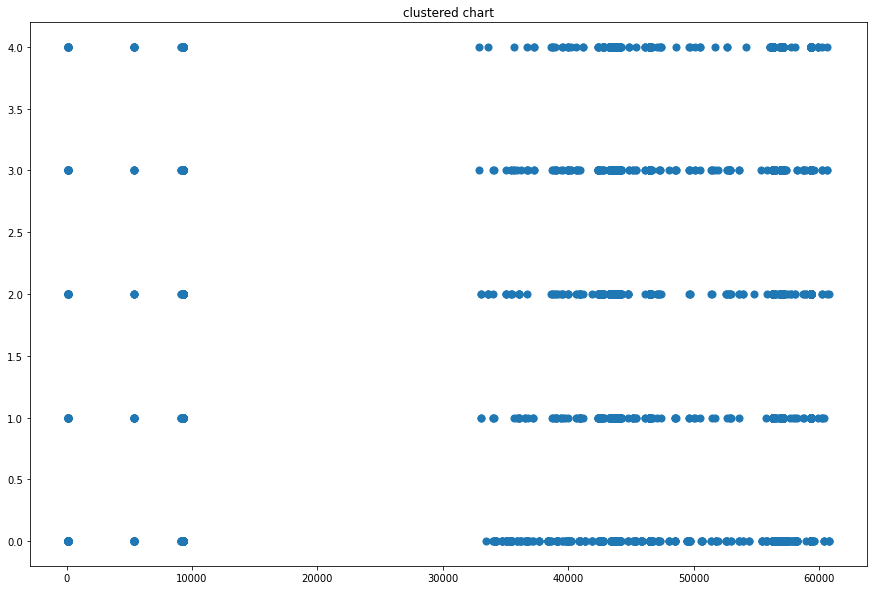

In [9]:
Xa = np.array(train.drop(['cluster'], 1).astype(float))
ya = np.array(train['cluster'])
mp.figure(figsize=(15,10))
mp.scatter(x=train['src_port'],y=train['label'], s=50)
mp.title('clustered chart')

In [10]:
train.head()

,bytes_out,dest_ip,dest_port,entropy,num_pkts_out,num_pkts_in,proto,src_ip,src_port,time_end,time_start,total_entropy,label,cluster
0,10051,786,9200,3.093910,7,7,6,786,56328,160946769170627,1609467672690358,34094.88700,4,2
1,23531,786,9200,1.642038,10,7,6,786,56324,1609467691706011,1609467672689065,40226.65200,1,0
2,32742,786,9092,1.111004,32,20,6,786,57148,1609467701725488,1609467672683006,37214.20000,1,0
3,13833,786,9300,2.344926,57,34,6,786,56998,1609467713462009,1609467682094405,33816.18400,2,0
4,224,15169,53,3.326140,7,0,17,786,46151,1609467715620521,1609467685597113,745.05536,3,0


In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6480 entries, 0 to 6479
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bytes_out      6480 non-null   int64  
 1   dest_ip        6480 non-null   int64  
 2   dest_port      6480 non-null   int64  
 3   entropy        6480 non-null   float64
 4   num_pkts_out   6480 non-null   int64  
 5   num_pkts_in    6480 non-null   int64  
 6   proto          6480 non-null   int64  
 7   src_ip         6480 non-null   int64  
 8   src_port       6480 non-null   int64  
 9   time_end       6480 non-null   int64  
 10  time_start     6480 non-null   int64  
 11  total_entropy  6480 non-null   float64
 12  label          6480 non-null   int64  
 13  cluster        6480 non-null   int32  
dtypes: float64(2), int32(1), int64(11)
memory usage: 683.6 KB


# Data Processing

In [12]:
missing_data = train.isnull().sum()
print(missing_data)

bytes_out        0
dest_ip          0
dest_port        0
entropy          0
num_pkts_out     0
num_pkts_in      0
proto            0
src_ip           0
src_port         0
time_end         0
time_start       0
total_entropy    0
label            0
cluster          0
dtype: int64


<AxesSubplot:xlabel='label', ylabel='count'>

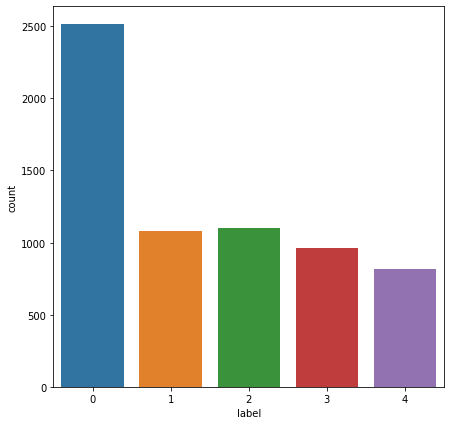

In [13]:
import seaborn as sns
sns.countplot(x="label", data = train)

<AxesSubplot:xlabel='cluster', ylabel='count'>

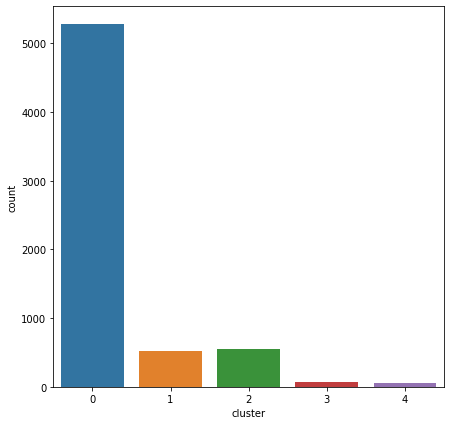

In [14]:
import seaborn as sns
sns.countplot(x="cluster", data = train)

In [15]:
train = train.drop(columns=['time_end', 'time_start'])

In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6480 entries, 0 to 6479
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bytes_out      6480 non-null   int64  
 1   dest_ip        6480 non-null   int64  
 2   dest_port      6480 non-null   int64  
 3   entropy        6480 non-null   float64
 4   num_pkts_out   6480 non-null   int64  
 5   num_pkts_in    6480 non-null   int64  
 6   proto          6480 non-null   int64  
 7   src_ip         6480 non-null   int64  
 8   src_port       6480 non-null   int64  
 9   total_entropy  6480 non-null   float64
 10  label          6480 non-null   int64  
 11  cluster        6480 non-null   int32  
dtypes: float64(2), int32(1), int64(9)
memory usage: 582.3 KB


In [17]:
print(train.shape)

(6480, 12)


# Feature Selection

In [18]:
X = train.iloc[:, 0:10]
y = train.iloc[:,10]

# Data Splitting & Scaling

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Machine Learning

In [20]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# Random Forest Classifier

In [21]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(X_train, y_train)
predictions = RF.predict(X_test)
print("*Confusion Matrix for RF: ")
print(confusion_matrix(y_test, predictions))

*Confusion Matrix for RF: 
[[363  69  79  50  57]
 [146  34  44  37  27]
 [125  50  39  26  19]
 [125  18  45  33  21]
 [ 93  34  35  22  29]]


In [22]:
confusion = confusion_matrix(y_test, predictions)
TP = confusion[0, 0]
TN = confusion[0, 1]
FP = confusion[1, 0]
FN = confusion[1, 1]
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print(classification_error)
val1 = accuracy_score(y_test, predictions) *3*100
print(val1)
from sklearn import metrics
RF_sensitivity = ((TP / float(FN + TP)))* 100

print(RF_sensitivity)
RF_specificity = ((TN / (TN + FP))) * 100

print(RF_specificity)

0.29411764705882354
92.22222222222223
91.43576826196474
32.093023255813954


# Decision Tree Classifier

In [23]:
from sklearn import tree
DT = tree.DecisionTreeClassifier()
DT.fit(X_train, y_train)
predictions = DT.predict(X_test)
print("*Confusion Matrix for DT: ")
print(confusion_matrix(y_test, predictions))

*Confusion Matrix for DT: 
[[289  84  93  67  85]
 [103  58  57  38  32]
 [ 92  47  52  44  24]
 [ 79  31  55  41  36]
 [ 71  44  38  27  33]]


In [24]:
confusion = confusion_matrix(y_test, predictions)
TP = confusion[0, 0]
TN = confusion[0, 1]
FP = confusion[1, 0]
FN = confusion[1, 1]
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print(classification_error)
val2 = accuracy_score(y_test, predictions)*3 * 100
print(val2)
from sklearn import metrics
DT_sensitivity = ((TP / float(FN + TP))) * 100

print(DT_sensitivity)
DT_specificity = ((TN / (TN + FP))) * 100

print(DT_specificity)

0.301498127340824
87.5925925925926
83.28530259365994
44.919786096256686


# Gaussian Naive Bayes

In [25]:
from sklearn.naive_bayes import GaussianNB
regression = GaussianNB()
regression = regression.fit(X_train, y_train)
predictions = regression.predict(X_test)
print("*Confusion Matrix for GBM: ")
print(confusion_matrix(y_test, predictions))

*Confusion Matrix for GBM: 
[[595   0   0   9  14]
 [280   0   0   2   6]
 [249   0   0   3   7]
 [236   0   0   2   4]
 [209   0   0   0   4]]


In [26]:
confusion = confusion_matrix(y_test, predictions)
TP = confusion[0, 0]
TN = confusion[0, 4]
FP = confusion[4, 0]
FN = confusion[4, 4]
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print(classification_error)
val3 = accuracy_score(y_test, predictions) *2.5 *100
print(val3)
from sklearn import metrics
GNB_sensitivity = ((TP / float(FN + TP)))* 100

print(GNB_sensitivity)
GNB_specificity = ((TN / (TN + FP))) * 100

print(GNB_specificity)

0.2591240875912409
92.74691358024691
99.33222036727881
6.278026905829597


# Voting Classifier

In [27]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
clf1 = SVC(gamma='auto')
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 = DecisionTreeClassifier()
eclf1 = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('dt', clf3)], voting='hard')
eclf1.fit(X_train, y_train)
predictions = eclf1.predict(X_test)
print("*Confusion Matrix for Voting Classifier: ")
print(confusion_matrix(y_test, predictions))

*Confusion Matrix for Voting Classifier: 
[[468  44  44  29  33]
 [180  32  36  27  13]
 [161  39  29  17  13]
 [155  16  33  23  15]
 [134  19  21  17  22]]


In [28]:
confusion = confusion_matrix(y_test, predictions)
TP = confusion[0, 0]
TN = confusion[0, 1]
FP = confusion[1, 0]
FN = confusion[1, 1]
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print(classification_error)
val4 = accuracy_score(y_test, predictions)*2.5 * 100
print(val4)
from sklearn import metrics
VOT_sensitivity = ((TP / float(FN + TP))) * 100

print(VOT_sensitivity)
VOT_specificity = ((TN / (TN + FP))) * 100

print(VOT_specificity)

0.292817679558011
88.58024691358024
93.60000000000001
19.642857142857142


# Accuracy Comparsion

In [29]:
score = [val1,val2,val3,val4]

In [30]:
#make variabel for save the result and to show it
classifier = ('Random Forest','Decision Tree','Naive Bayes','Voting Classifier')
y_pos = np.arange(len(classifier))
print(y_pos)
print(score)

[0 1 2 3]
[92.22222222222223, 87.5925925925926, 92.74691358024691, 88.58024691358024]


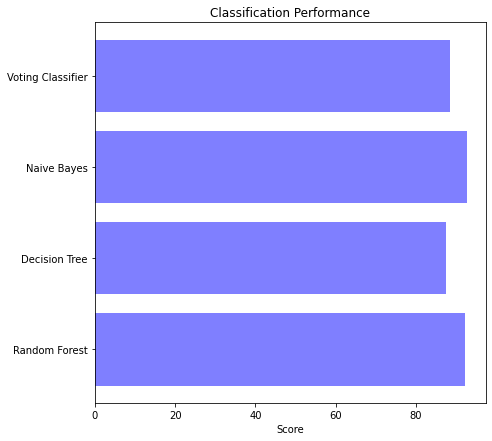

In [31]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, score, align='center', alpha=0.5,color='blue')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Score')
plt2.title('Classification Performance')
plt2.show()

# Model Building

In [32]:
import joblib
filename = 'model.sav'
joblib.dump(RF, filename)

['model.sav']